# The ABCD Method

In this lab we will explore a typical data driven background method used in particle physics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
import math

## Introduction

The method depends on 2 uncorrelated variables. As an example, lets create a uniform data distribution of random tuples and plot it over a plane. We then divide the plane into 4 regions, A, B, C, and D: (as a side note - it took me 43 iterations to get the plot below looking the way I wanted)

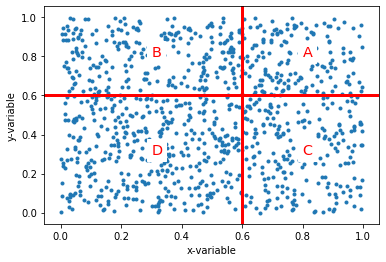

In [46]:
data_flat = np.random.rand(1000, 2)
xa = 0.6
ya = 0.6
plt.scatter(data[:, 0], data[:, 1], marker='.')
plt.xlabel('x-variable')
plt.ylabel('y-variable')
plt.axvline(x=xa, color='r', linewidth=3)
plt.axhline(y=ya, color='r', linewidth=3)
plt.text(0.8, 0.8, 'A', color='r', fontsize='x-large', bbox=dict(color='w', alpha=1.0))
plt.text(0.3, 0.8, 'B', color='r', fontsize='x-large', bbox=dict(color='w', alpha=1.0))
plt.text(0.8, 0.3, 'C', color='r', fontsize='x-large', bbox=dict(color='w', alpha=1.0))
_ = plt.text(0.3, 0.3, 'D', color='r', fontsize='x-large', bbox=dict(color='w', alpha=1.0))

The ABCD method then says that the counts of events in the $A, B, C,$ and $D$ regions are related:

$$A/C = B/D$$

In a normal analysis one chooses the `x-variable` and `y-variable` to push all the signal into region A. Then in the experiment you can count data points in regions $B, C,$ and $D$ and determine what you should expect to see in $A$ because $A=BC/D$. You've now determined what you expect to see in $A$ is there were no signal. If you see more than that in $A$ (taking into account errors) then you've seen your signal!

## Why does it work?

It turns out this is quite general. Lets start by defining a function $f(x,y)$ that is valid over the plane. And the total number of events in the plane is:

$$N = \int_0^1 \int_0^1 \! f(x,y) \, \mathrm{d}x \, \mathrm{d}y$$

We have arbitrarily taken the plane to go from $(0,1)$ here. Lets divide up the regions, as labeled in the plot above, at positions $x_a$ and $y_a$. Then we can sum up the everything in each region as follows:

$$ A = \int_{y_a}^1 \int_{x_a}^1 \! f(x,y) \, \mathrm{d}x \, \mathrm{d}y$$
$$ B = \int_{y_a}^1 \int_0^{x_a} \! f(x,y) \, \mathrm{d}x \, \mathrm{d}y$$
$$ C = \int_0^{y_a} \int_{x_a}^1 \! f(x,y) \, \mathrm{d}x \, \mathrm{d}y$$
$$ D = \int_0^{y_a} \int_0^{x_a} \! f(x,y) \, \mathrm{d}x \, \mathrm{d}y$$

This looks intractable if we look at $A=BC/D$:

$$ A = BC/D = \frac{\left(\int_{y_a}^1 \int_0^{x_a} \! f(x,y) \, \mathrm{d}x \, \mathrm{d}y \right) \left( \int_0^{y_a} \int_{x_a}^1 \! f(x,y) \, \mathrm{d}x \, \mathrm{d}y \right)}{\int_0^{y_a} \int_0^{x_a} \! f(x,y) \, \mathrm{d}x \, \mathrm{d}y}$$

The key thing is that the variables `x-variable` and `y-variable` are chosen to be uncorrelated. This means:

$$ f(x,y) = f_x(x) f_y(y)$$

If we re-write the counts we find:

$$ A = \left( \int_{y_a}^1 \! f_y(y) \, \mathrm{d}y \right) \left( \int_{x_a}^1 \! f_x(x) \, \mathrm{d}x \right) $$
$$ B = \left( \int_{y_a}^1 \! f_y(y) \, \mathrm{d}y \right) \left( \int_0^{x_a} \! f_x(x) \, \mathrm{d}x \right) $$
$$ C = \left( \int_0^{y_a} \! f_y(y) \, \mathrm{d}y \right) \left( \int_{x_a}^1 \! f_x(x) \, \mathrm{d}x \right) $$
$$ D = \left( \int_0^{y_a} \! f_y(y) \, \mathrm{d}y \right) \left( \int_0^{x_a} \! f_x(x) \, \mathrm{d}x \right) $$

And we can substitute that in for $BC/D$:

$$
\begin{align}
BC/D &= \frac{\left( \int_{y_a}^1 \! f_y(y) \, \mathrm{d}y \right) \left( \int_0^{x_a} \! f_x(x) \, \mathrm{d}x \right) \left( \int_0^{y_a} \! f_y(y) \, \mathrm{d}y \right) \left( \int_{x_a}^1 \! f_x(x) \, \mathrm{d}x \right)}{\left( \int_0^{y_a} \! f_y(y) \, \mathrm{d}y \right) \left( \int_0^{x_a} \! f_x(x) \, \mathrm{d}x \right)} \\
     &= \left( \int_{y_a}^1 \! f_y(y) \, \mathrm{d}y \right) \left( \int_{x_a}^1 \! f_x(x) \, \mathrm{d}x \right) \\
     &= A
\end{align}
$$

In short, this is a generic statement - and can be made for almost any background that can be described by at least two uncorrelated axes 

## Test it out

Lets calculate $A, B, C$, and $D$, and also $BC/D$ to see how well the prediction looks.

There are lots of ways to count things in regions. I've seen people do `np.where` and other things when looking over their shoulders. I'll do my best to catalog them all and show them off to the class. I am using the `numpy` technique of creating a masked array. Each element of the array is `True` or `False` depending on some test. So, for example, each axis needs to be split into those above the line and below:

In [72]:
data_above_x = data[:,0] >= xa
data_above_y = data[:,1] >= ya

Lets do a quick scatter plot of what we expect to be in for points above $x$:

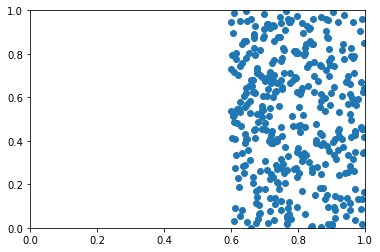

In [59]:
fig, ax = plt.subplots()
_ = ax.scatter(data[data_above_x][:, 0], data[data_above_x][:, 1])
ax.set_xlim([0,1])
_ = ax.set_ylim([0,1])

Now define the points in each region. This is, again, a masked array, not a count. Not we can manipulate things with standard logic, mostly...

In [73]:
region_A = data_above_x & data_above_y
region_B = np.logical_not(data_above_x) & data_above_y
region_C = data_above_x & np.logical_not(data_above_y)
region_D = np.logical_not(data_above_x) & np.logical_not(data_above_y)

And, plot everything in region A as a test (this was a good thing, as I messed up my first definition of region A!). I used colors (some really bad ones!), but I also tried to use different markers here because about 10% of the population is color blind.

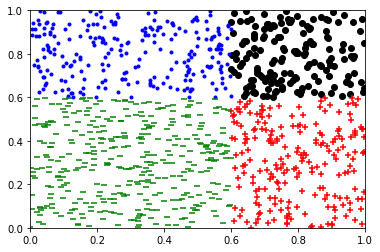

In [68]:
fig, ax = plt.subplots()
_ = ax.scatter(data[region_A][:, 0], data[region_A][:, 1], color='black')
_ = ax.scatter(data[region_B][:, 0], data[region_B][:, 1], color='blue', marker='.')
_ = ax.scatter(data[region_C][:, 0], data[region_C][:, 1], color='red', marker='+')
_ = ax.scatter(data[region_D][:, 0], data[region_D][:, 1], color='green', marker='_')
ax.set_xlim([0,1])
_ = ax.set_ylim([0,1])

Now we can count and predict!

In [69]:
counts_A, counts_B, counts_C, counts_D = np.sum(region_A), np.sum(region_B), np.sum(region_C), np.sum(region_D)
counts_A, counts_B, counts_C, counts_D

(162, 240, 216, 382)

In [71]:
predicted_A = counts_B*counts_C/counts_D
predicted_A

135.7068062827225

Ok - not too bad... but it is also hard to tell how good this is because it is off by a bit!

## How good a prediction is this?

To really test how good a prediction this is we need to run the above repeatedly, and then look to see how the differences is distributed. To do that we now need a function that does the calculation step-by-step.

In [74]:
def calc_ABCD_delta():
    data = np.random.rand(1000, 2)
    data_above_x = data[:,0] >= xa
    data_above_y = data[:,1] >= ya
    region_A = data_above_x & data_above_y
    region_B = np.logical_not(data_above_x) & data_above_y
    region_C = data_above_x & np.logical_not(data_above_y)
    region_D = np.logical_not(data_above_x) & np.logical_not(data_above_y)
    counts_A, counts_B, counts_C, counts_D = np.sum(region_A), np.sum(region_B), np.sum(region_C), np.sum(region_D)
    predicted_A = counts_B*counts_C/counts_D
    return counts_A-predicted_A

In [78]:
calc_ABCD_delta()

-2.0804289544235814

I built that function up by cut-pasting from the above rows. If this was building towards something you wanted to keep around long-term, the fact that you wrote that function here might be a clue that it was time to start creating a python file and library that you import into the notebook (or many notebooks).

Next, lets create a sequence of these guys and plot them. I'm going to use a generator expression for that, and turn it into a `numpy` array.

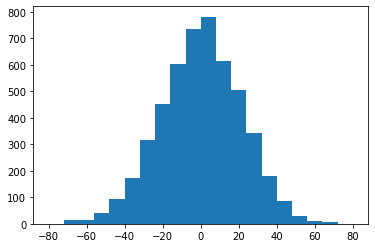

In [92]:
lots_of_trials = np.array([calc_ABCD_delta() for _ in range(0,5000)])
_ = plt.hist(lots_of_trials, bins=20, range=(-80,80))

That looks pretty gaussian. Lets calculate the standard deviation of that, and put it on the plot. And label the plot nicely!

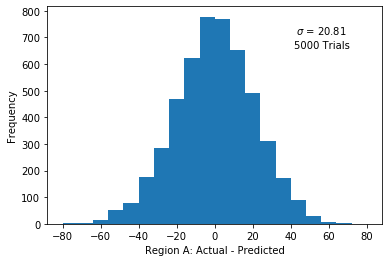

In [91]:
lots_of_trials = np.array([calc_ABCD_delta() for _ in range(0,5000)])
std = np.std(lots_of_trials)
plt.text(0.8, 0.9,f'$\sigma$ = {std:.2f}', ha='center', va='center', transform=ax.transAxes)
plt.text(0.8, 0.83,'5000 Trials', ha='center', va='center', transform=ax.transAxes)
plt.hist(lots_of_trials, bins=20, range=(-80,80))
plt.xlabel('Region A: Actual - Predicted')
_ = plt.ylabel('Frequency')

I had an ulterior motive for running that plot twice - I wanted to be sure to show how the distribution doesn't look exactly the same. Also, note how there are long tails - they look a bit non-gaussian. If you explore it further, you'll see there are longer tails than you would expect for a gaussian. This is connected with the fact that $A, B, C$, and $D$ aren't completely independent as we set the total number of points we generated to 1000.

## The Effect Of Statistics

How do statistics affect this? Lets vary the number of points and look at the standard deviations that come from that. To do that, we'll create another function that basically does what the above cells did, but with a parameter for the statistics:

In [93]:
# I'm going to call it number 1 - I am doing this to show the evolution. I suspect most people would keep modifying and improving the first instance above, which is fine!
def calc_ABCD_delta_1(n=1000):
    data = np.random.rand(n, 2)
    data_above_x = data[:,0] >= xa
    data_above_y = data[:,1] >= ya
    region_A = data_above_x & data_above_y
    region_B = np.logical_not(data_above_x) & data_above_y
    region_C = data_above_x & np.logical_not(data_above_y)
    region_D = np.logical_not(data_above_x) & np.logical_not(data_above_y)
    counts_A, counts_B, counts_C, counts_D = np.sum(region_A), np.sum(region_B), np.sum(region_C), np.sum(region_D)
    predicted_A = counts_B*counts_C/counts_D
    return counts_A-predicted_A

def calc_ABCD_std(n=1000):
    lots_of_trials = np.array([calc_ABCD_delta_1(n) for _ in range(0,5000)])
    return np.std(lots_of_trials)

In [94]:
calc_ABCD_std(1000), calc_ABCD_std(10000)

(21.238840609575877, 66.31755120146109)

As you saw in class I didn't totally understand why the 10,000 trail version should have a larger standard deviation. Lets look at the plots of the two side-by-side:

In [107]:
def plt_ABCD_diff(ax, n=1000):
    lots_of_trials = np.array([calc_ABCD_delta_1(n) for _ in range(0,5000)])
    std = np.std(lots_of_trials)
    plt.hist(lots_of_trials, bins=20, range=(-150,150))
    plt.text(0.8, 0.9,f'$\sigma$ = {std:.2f}', ha='center', va='center', transform=ax.transAxes)
    plt.text(0.8, 0.83,'5000 Trials', ha='center', va='center', transform=ax.transAxes)
    plt.xlabel('Region A: Actual - Predicted')
    _ = plt.ylabel('Frequency')

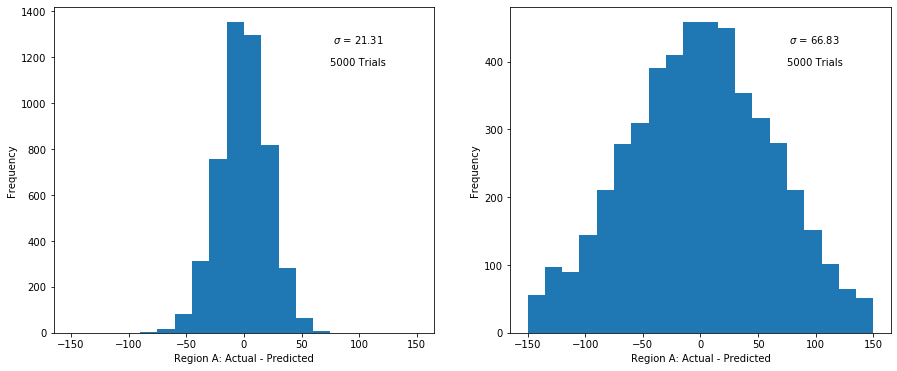

In [112]:
plt.figure(figsize=(15,6))
ax = plt.subplot(121)
plt_ABCD_diff(ax, n=1000)
ax = plt.subplot(122)
plt_ABCD_diff(ax, n=10000)

What is going on here is exactly the same thing as $\sqrt(N)$ statistics - $\sqrt(N)$ gets larger as $N$ gets larger. We need to do what we normally do here: look at the fracitonal error. So divide by $N$ (which is $1/\sqrt(N)$):

In [122]:
def calc_ABCD_std_1(n=1000):
    lots_of_trials = np.array([calc_ABCD_delta_1(n) for _ in range(0,5000)])
    return np.std(lots_of_trials)/n

In [124]:
calc_ABCD_std_1(1000), calc_ABCD_std_1(10000)

(0.02108732651752736, 0.006669883140420002)

Much better. Now, one more thing we need to watch out before we generate everything we need - the low statistics region:

In [125]:
calc_ABCD_std_1(10)

i:\anaconda3\envs\phys_427\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
i:\anaconda3\envs\phys_427\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


nan

Yikes! This is coming from the fact that region $D$ sometimes has zero events in it! We have a few choices here - we can ignore it (that is, mask it out), or we can track it. We'll track it, as I was mentioning in class. It is useful to know how well this technique is going to do in really low statistics regions! This means a new ABCD calculator. The question is: how to pass the information back. I've decided to use a tuple for this:

In [154]:
# I'm going to call it number 1 - I am doing this to show the evolution. I suspect most people would keep modifying and improving the first instance above, which is fine!
def calc_ABCD_delta_2(n=1000):
    '''
    Calculate the difference between predicted and actual variables in the signal region of the ABCD method
    for a random data distribution.
    
    If region D has zero events in it, we can't make the prediction. In that case we return nan.
    
    Args:
        n          Number of events in the ABCD plane
        
    Returns
        diff            The difference between expected and actual. Return nan if region D has zero in it.
    '''
    data = np.random.rand(n, 2)
    data_above_x = data[:,0] >= xa
    data_above_y = data[:,1] >= ya
    region_A = data_above_x & data_above_y
    region_B = np.logical_not(data_above_x) & data_above_y
    region_C = data_above_x & np.logical_not(data_above_y)
    region_D = np.logical_not(data_above_x) & np.logical_not(data_above_y)
    counts_A, counts_B, counts_C, counts_D = np.sum(region_A), np.sum(region_B), np.sum(region_C), np.sum(region_D)
    if counts_D == 0:
        return math.nan
    predicted_A = counts_B*counts_C/counts_D
    return counts_A-predicted_A

def calc_ABCD_std_2(n=1000):
    '''
    Calcualte the fractional standard deviation for running 5000 trials. Count the number that failed to do the prediction.
    
    Args:
        n          How many trials to run each time
    
    Returns:
        std        Standard deviation of fractional difference between predicted and actual
        zero_count How many in region D had zero count?
    '''
    lots_of_trials = np.array([calc_ABCD_delta_2(n) for _ in range(0,5000)])
    is_zero = np.isnan(lots_of_trials)
    return (np.std(lots_of_trials[np.logical_not(is_zero)])/n, np.sum(is_zero))

In [155]:
calc_ABCD_std_2(10)

(0.3284790763728703, 54)

Ok - now we have a function that gets us the information we want. Note I added comments as headers (`docstrings` in python). This is because the functions are now returning some more complex things, and it is good to provide programmer documentation. Because, at anytime you can do:

In [156]:
help(calc_ABCD_std_2)

Help on function calc_ABCD_std_2 in module __main__:

calc_ABCD_std_2(n=1000)
    Calcualte the fractional standard deviation for running 5000 trials. Count the number that failed to do the prediction.
    
    Args:
        n          How many trials to run each time
    
    Returns:
        std        Standard deviation of fractional difference between predicted and actual
        zero_count How many in region D had zero count?



How cool is that?

Ok - lets make this plot with the error informaiton as a function of statistics!

In [226]:
%%time
stat_list = [5, 10, 20, 50, 100, 500, 1000, 5000, 10000, 50000]
stats_result = np.array([calc_ABCD_std_2(s) for s in stat_list])

Wall time: 7.19 s


In [227]:
stats_result

array([[3.08549305e-01, 5.21000000e+02],
       [3.16493877e-01, 5.70000000e+01],
       [2.14270944e-01, 1.00000000e+00],
       [1.02729725e-01, 0.00000000e+00],
       [6.93941724e-02, 0.00000000e+00],
       [2.97603598e-02, 0.00000000e+00],
       [2.11073784e-02, 0.00000000e+00],
       [9.52344819e-03, 0.00000000e+00],
       [6.76222939e-03, 0.00000000e+00],
       [2.99480328e-03, 0.00000000e+00]])

Ok - the trend looks good! Lets make a plot that gives us everything we need. I converted it to a `numpy` array to get nice and easy array slicing below.

In [228]:
stats_result[:,0]

array([0.30854931, 0.31649388, 0.21427094, 0.10272973, 0.06939417,
       0.02976036, 0.02110738, 0.00952345, 0.00676223, 0.0029948 ])

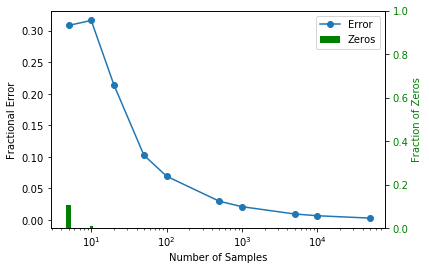

In [234]:
fig, ax1 = plt.subplots()

p1 = ax1.plot(stat_list, stats_result[:,0], 'o-', label='Error')[0]
ax1.set_xscale('log')
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Fractional Error')

color = 'green'
ax2 = ax1.twinx()
ax2.set_ylabel('Fraction of Zeros', color=color)
ax2.tick_params(axis='y', labelcolor=color)
p2 = ax2.bar(stat_list, stats_result[:,1]/5000, color=color, label='Zeros')
ax2.set_ylim([0,1.0])

plots=[p1,p2]
labs= [l.get_label() for l in plots]
_ = ax2.legend(plots, labs)

After seeing the above plot with the default scan value, I thought it would be nicer to add a few more poitns to show the trends. Which is what you see above. Note the behavior at for very small numbers. The problem there is that we are dividing by too large an $n$ - because half the n's have been removed. Fixing that, however, is beyond this HW. :-)